In [2]:
import sys
import pickle
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nn import NeuralNetwork
from linear import LinearLayer
from activation import ActivationLayer
from activations import softmax
from activations import relu
from activations import tanh
from metrics import accuracy
from losses import categorical_cross_entropy
from losses import mse

In [3]:
TRAIN_PATH = "train.csv"
TEST_PATH = "train.csv"
TRAIN_RATIO = 0.8
MODEL_PATH = "model.pkl"

In [4]:
full_train = pd.read_csv(TRAIN_PATH)
full_indices = list(full_train.index)
train_indices = random.sample(full_indices, int(len(full_indices) * TRAIN_RATIO))
val_indices = list(set(list(full_indices)) - set(train_indices))
train = full_train.iloc[train_indices].reset_index(drop=True)
val = full_train.iloc[val_indices].reset_index(drop=True)

In [5]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0:1]

In [6]:
print("Images: (%d, %d)" % X_train.shape)
print("Labels: (%d, %d)" % y_train.shape)

Images: (33600, 784)
Labels: (33600, 1)


In [7]:
X_train = np.array(X_train)
X_train = X_train.reshape(X_train.shape[0], 1, 28*28)
X_train = X_train.astype("float32")
X_train /= 255
y_train = np.array(y_train)
y_train = np.eye(10)[y_train]

In [8]:
X_val = val.iloc[:,1:]
y_val = val.iloc[:,0:1]

In [9]:
print("Images: (%d, %d)" % X_val.shape)
print("Labels: (%d, %d)" % y_val.shape)

Images: (8400, 784)
Labels: (8400, 1)


In [10]:
X_val = np.array(X_val)
X_val = X_val.reshape(X_val.shape[0], 1, 28*28)
X_val = X_val.astype("float32")
X_val /= 255
y_val = np.array(y_val)
y_val = np.eye(10)[y_val]

In [11]:
test = pd.read_csv(TEST_PATH)
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0:1]

In [12]:
print("Images: (%d, %d)" % X_test.shape)
print("Labels: (%d, %d)" % y_test.shape)

Images: (42000, 784)
Labels: (42000, 1)


In [13]:
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], 28*28)
X_test = X_test.astype('float32')
X_test /= 255
y_test = np.array(y_test)
y_test = np.eye(10)[y_test]

<function matplotlib.pyplot.show(close=None, block=None)>

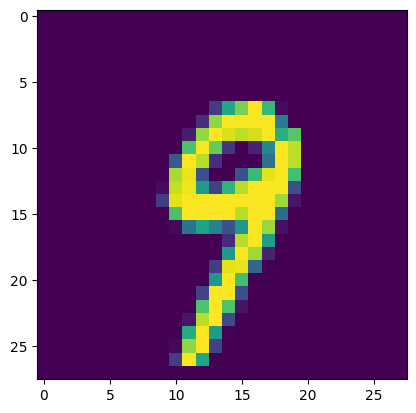

In [14]:
plt.imshow(np.reshape(X_train[100], (28, 28)))
plt.show

In [15]:
hyperparameters = {
    "hidden_layer_input": [100, 200],
    "hidden_layer_output": [100, 200],
    "l2_lambdas": [0.0, 0.0001],
    "learning_rate": [0.01, 0.1]
}

grid = list(itertools.product(*hyperparameters.values()))

for item in grid:
    params = dict(zip(hyperparameters.keys(), item))
    model = NeuralNetwork()
    model.add(LinearLayer(28*28, params["hidden_layer_input"], l2_lambda=params["l2_lambdas"]))
    model.add(ActivationLayer(tanh))
    model.add(LinearLayer(params["hidden_layer_input"], params["hidden_layer_output"],
                          l2_lambda=params["l2_lambdas"]))
    model.add(ActivationLayer(tanh))
    model.add(LinearLayer(params["hidden_layer_output"], 10, l2_lambda=params["l2_lambdas"]))
    model.add(ActivationLayer(tanh))
    model.compile(mse)
    train_errors, val_errors, reg_losses, total_losses, train_accuracies, val_accuracies = model.fit(
        X_train[0:2000], y_train[0:2000], X_val[0:2000], y_val[0:2000], epochs=20,
        initial_learning_rate=params["learning_rate"], verbose=0)
    train_predictions = model.predict(X_train[0:2000])
    train_predictions = np.array(train_predictions).reshape(len(train_predictions), -1)
    train_accuracy = accuracy(np.array(y_train[0:2000]).reshape(len(y_train[0:2000]), -1), train_predictions)
    val_predictions = model.predict(X_val[0:2000])
    val_predictions = np.array(val_predictions).reshape(len(val_predictions), -1)
    val_accuracy = accuracy(np.array(y_val[0:2000]).reshape(len(y_val[0:2000]), -1), val_predictions)
    print(("hidden_layer_input = %d, hidden_layer_output = %d, l2_lambdas = %f, learning_rate = %f, " +
           "train_accuracy = %f, val_accuracy = %f")
          % (params["hidden_layer_input"], params["hidden_layer_output"],
             params["l2_lambdas"], params["learning_rate"], train_accuracy, val_accuracy))

hidden_layer_input = 100, hidden_layer_output = 100, l2_lambdas = 0.000000, learning_rate = 0.010000, train_accuracy = 83.850000, val_accuracy = 76.200000
hidden_layer_input = 100, hidden_layer_output = 100, l2_lambdas = 0.000000, learning_rate = 0.100000, train_accuracy = 96.650000, val_accuracy = 85.150000
hidden_layer_input = 100, hidden_layer_output = 100, l2_lambdas = 0.000100, learning_rate = 0.010000, train_accuracy = 86.600000, val_accuracy = 74.950000
hidden_layer_input = 100, hidden_layer_output = 100, l2_lambdas = 0.000100, learning_rate = 0.100000, train_accuracy = 97.900000, val_accuracy = 86.600000
hidden_layer_input = 100, hidden_layer_output = 200, l2_lambdas = 0.000000, learning_rate = 0.010000, train_accuracy = 85.750000, val_accuracy = 73.550000
hidden_layer_input = 100, hidden_layer_output = 200, l2_lambdas = 0.000000, learning_rate = 0.100000, train_accuracy = 89.500000, val_accuracy = 80.600000
hidden_layer_input = 100, hidden_layer_output = 200, l2_lambdas = 0.00

In [16]:
model = NeuralNetwork()
model.add(LinearLayer(28*28, 200, l2_lambda=0.0001))
model.add(ActivationLayer(tanh))
model.add(LinearLayer(200, 100, l2_lambda=0.0001))
model.add(ActivationLayer(tanh))
model.add(LinearLayer(100, 10, l2_lambda=0.0001))
model.add(ActivationLayer(softmax))

In [17]:
model.summary()

LinearLayer ( 784 -> 200 )
Weights: (784, 200)
Biases: (1, 200)
Total parameters: 157000

ActivationLayer

LinearLayer ( 200 -> 100 )
Weights: (200, 100)
Biases: (1, 100)
Total parameters: 20100

ActivationLayer

LinearLayer ( 100 -> 10 )
Weights: (100, 10)
Biases: (1, 10)
Total parameters: 1010

ActivationLayer

Total parameters in model: 178110


In [18]:
model.details()

Neural Network Details
Layer 0: LinearLayer
  Weights:
[[ 0.24831809  0.22841076 -0.48712969 ...  0.29979979  0.09329393
  -0.32081041]
 [-0.19100836  0.17458305 -0.01544239 ...  0.08855952 -0.07513442
   0.34489801]
 [ 0.03881317  0.49561327 -0.48797305 ... -0.36579219 -0.00729731
   0.3519431 ]
 ...
 [ 0.03479691  0.20600971 -0.14826366 ... -0.04308331  0.2841172
   0.10238291]
 [ 0.31812205 -0.20414139 -0.25460542 ...  0.04922776 -0.10857643
  -0.17037089]
 [-0.27782224  0.25375688 -0.01506178 ... -0.31804709  0.18352391
  -0.22518603]]
  Biases:
[[-0.31757808  0.44573261 -0.10210978  0.28598535  0.29438546  0.38293305
  -0.01348483 -0.3803755   0.40578086  0.17638155  0.11959106  0.40481003
   0.42373645  0.30546578 -0.09695554  0.24294391  0.169622    0.1801658
   0.05447767  0.3258171  -0.10760896  0.0452384   0.23653639 -0.40867875
   0.16316829 -0.46817596 -0.26908212  0.21277119 -0.32020423 -0.48482963
   0.34326973  0.34789587 -0.32322228 -0.00398002  0.10092833 -0.25107787
 

In [19]:
model.compile(categorical_cross_entropy)
train_errors, val_errors, reg_losses, total_losses, train_accuracies, val_accuracies = model.fit(
    X_train, y_train, X_val, y_val, epochs=20, initial_learning_rate=0.1)

epoch 1/20: train_loss = 0.419906, val_loss = 0.384525, reg_loss = 0.560689, total_loss = 0.980595, train_accuracy = 0.873452, val_accuracy = 0.892738
epoch 2/20: train_loss = 0.245837, val_loss = 0.277936, reg_loss = 0.314502, total_loss = 0.560340, train_accuracy = 0.927798, val_accuracy = 0.925952
epoch 3/20: train_loss = 0.203142, val_loss = 0.316443, reg_loss = 0.181202, total_loss = 0.384344, train_accuracy = 0.940536, val_accuracy = 0.909881
epoch 4/20: train_loss = 0.180063, val_loss = 0.181260, reg_loss = 0.110569, total_loss = 0.290632, train_accuracy = 0.947946, val_accuracy = 0.951786
epoch 5/20: train_loss = 0.160105, val_loss = 0.172187, reg_loss = 0.071897, total_loss = 0.232002, train_accuracy = 0.952976, val_accuracy = 0.952262
epoch 6/20: train_loss = 0.144677, val_loss = 0.167379, reg_loss = 0.049606, total_loss = 0.194282, train_accuracy = 0.957619, val_accuracy = 0.950952
epoch 7/20: train_loss = 0.135793, val_loss = 0.173884, reg_loss = 0.036915, total_loss = 0.17

In [20]:
pickle.dump(model, open(MODEL_PATH, "wb"))

In [21]:
model.details()

Neural Network Details
Layer 0: LinearLayer
  Weights:
[[ 4.08405063e-04  3.75663783e-04 -8.01174956e-04 ...  4.93076261e-04
   1.53439143e-04 -5.27632109e-04]
 [-3.14148612e-04  2.87134148e-04 -2.53978728e-05 ...  1.45652519e-04
  -1.23572460e-04  5.67248620e-04]
 [ 6.38354370e-05  8.15127781e-04 -8.02562018e-04 ... -6.01612970e-04
  -1.20017771e-05  5.78835586e-04]
 ...
 [ 5.72299533e-05  3.38821101e-04 -2.43847029e-04 ... -7.08584745e-05
   4.67283328e-04  1.68387656e-04]
 [ 5.23210602e-04 -3.35748314e-04 -4.18745745e-04 ...  8.09641590e-05
  -1.78574040e-04 -2.80206465e-04]
 [-4.56930112e-04  4.17350160e-04 -2.47718870e-05 ... -5.23087326e-04
   3.01839052e-04 -3.70360114e-04]]
  Biases:
[[-0.47053595  0.33326098  0.23009233  0.14843727  0.36429727  0.17117118
   0.37124215 -0.45377317  0.0501686  -0.84607664  0.41872224  0.85436137
   0.1910367   0.40649813  0.04050843  0.54158501  0.12751722  0.04877065
   0.12263835  0.15410337 -0.30988998 -0.16853656  0.42095973 -0.50316719
   

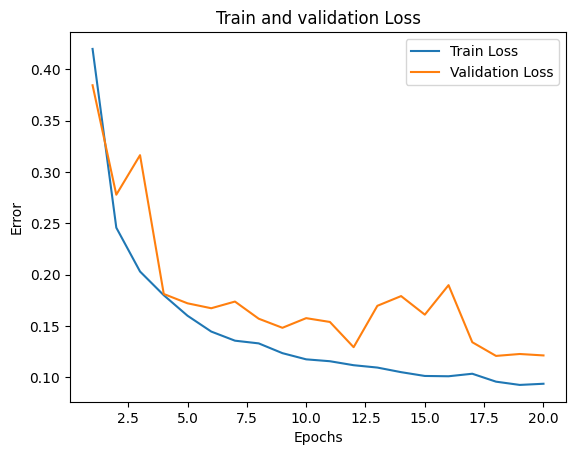

In [22]:
x_axis = range(1, len(train_errors) + 1)
plt.plot(x_axis, train_errors, label="Train Loss")
plt.plot(x_axis, val_errors, label="Validation Loss")
plt.title("Train and validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

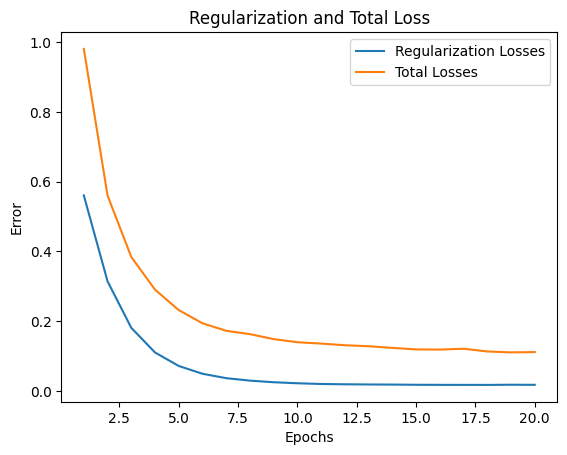

In [23]:
x_axis = range(1, len(train_errors) + 1)
plt.plot(x_axis, reg_losses, label="Regularization Losses")
plt.plot(x_axis, total_losses, label="Total Losses")
plt.title("Regularization and Total Loss")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

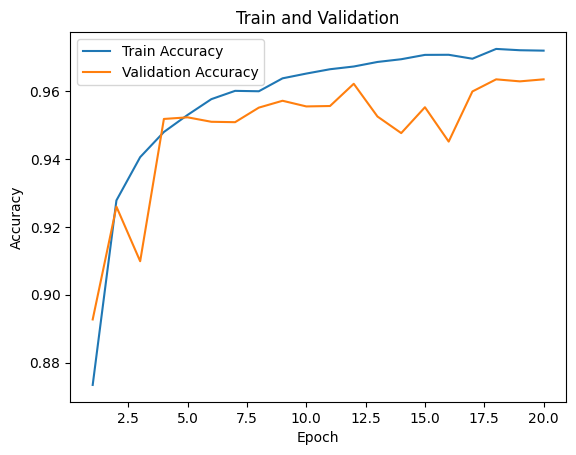

In [24]:
plt.plot(x_axis, train_accuracies, label="Train Accuracy")
plt.plot(x_axis, val_accuracies, label="Validation Accuracy")
plt.title("Train and Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
model = pickle.load(open(MODEL_PATH, "rb"))

In [26]:
y_pred = model.predict(X_test)

In [27]:
test_accuracy = accuracy(np.array(y_pred).reshape(len(y_pred), -1),
                         np.array(y_test).reshape(len(y_test), -1))
print("Test Accuracy: " + str((test_accuracy)) + "%")

Test Accuracy: 97.46904761904761%


In [28]:
np.argmax(y_test[100])

9

<function matplotlib.pyplot.show(close=None, block=None)>

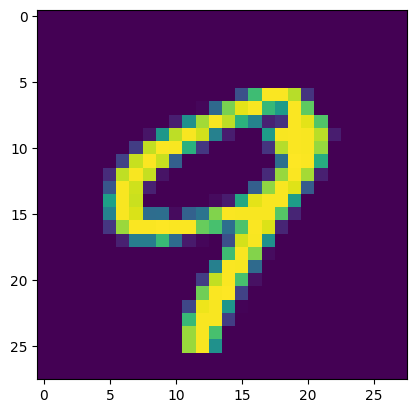

In [29]:
plt.imshow(np.reshape(X_test[100], (28, 28)))
plt.show